# **Top Ten Player Study**

## Objectives

* Answer business requirement one:
  * The client wishes us to conduct an analysis of current elite-level golf tournament data 
    to determine which golfing skills (e.g., driving, approach play, chipping, and putting) 
    are most likely to result in a player reaching the top ten of a tournament. 
    They are specifically interested in learning which skill to focus on to help a player 
    improve from a 30th–11th place finish to a top-ten finish.

## Inputs

* inputs\datasets\raw\ASA All PGA Raw Data - Tourn Level.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the StreamLit App.

## Additional Comments

* Although more will be done later, a level of data cleaning is done in this notebook to sort the confusion in the data between 'pos' and 'finish' features discovered in the previous notebook. This was necessary at this stage to avoid analysing data with errors. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\project-five-golf-data-analytics\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\project-five-golf-data-analytics'

In [4]:
import pandas as pd
import numpy as np

First, gain an overview of the data (bearing in mind missing fields and some data errors have been studied in the Data Collection phase).

In [5]:
file_path = "inputs/datasets/raw/ASA All PGA Raw Data - Tourn Level.csv"
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns\n")

display(df.head())

df.info()

Data loaded successfully!
Shape: 36,864 rows × 37 columns



Player_initial_last  tournament id  player id  hole_par  strokes  hole_DKP  \
0            A. Ancer      401353224       9261       288      289      60.0   
1           A. Hadwin      401353224       5548       288      286      72.5   
2           A. Lahiri      401353224       4989       144      147      21.5   
3             A. Long      401353224       6015       144      151      20.5   
4            A. Noren      401353224       3832       144      148      23.5   

   hole_FDP  hole_SDP  streak_DKP  streak_FDP  ...  purse  season  no_cut  \
0      51.1        56           3         7.6  ...   12.0    2022       0   
1      61.5        61           8        13.0  ...   12.0    2022       0   
2      17.4        27           0         0.0  ...   12.0    2022       0   
3      13.6        17           0         0.4  ...   12.0    2022       0   
4      18.1        23           0         1.2  ...   12.0    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  
0     T32     0.20   -0.13   -0.08    0.86    0.65      0.85  
1     T18     0.36    0.75    0.31    0.18    1.24      1.60  
2     CUT    -0.56    0.74   -1.09    0.37    0.02     -0.54  
3     CUT    -1.46   -1.86   -0.02    0.80   -1.08     -2.54  
4     CUT     0.53   -0.36   -1.39    0.19   -1.56     -1.04  

[5 rows x 37 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [6]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()

print("\nNumerical features:", len(num_features))
print(num_features)
print("\nCategorical features:", len(cat_features))
print(cat_features)


Numerical features: 31
['tournament id', 'player id', 'hole_par', 'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'purse', 'season', 'no_cut', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

Categorical features: 6
['Player_initial_last', 'player', 'tournament name', 'course', 'date', 'Finish']


Check for duplicates.

In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Before further data exploration, it is necessary to create a data frame of data that combines the pos and finish features (see data collection notebook) to check that this data will be suitable for the client's business requirements.
To do this, first we need to make 'Finish' entirely numeric data.

In [8]:
df_temp = df.copy()

df_temp['finish_clean'] = df_temp['Finish'].astype(str).str.replace('T', '', regex=False)

df_temp['finish_numeric'] = pd.to_numeric(df_temp['finish_clean'], errors='coerce')

df_temp['finish_numeric'] = df_temp['finish_numeric'].fillna(0)

print(df_temp[['pos', 'Finish', 'finish_clean', 'finish_numeric']].head(10))



    pos Finish finish_clean  finish_numeric
0  32.0    T32           32            32.0
1  18.0    T18           18            18.0
2   NaN    CUT           CU             0.0
3   NaN    CUT           CU             0.0
4   NaN    CUT           CU             0.0
5   NaN    CUT           CU             0.0
6  26.0    T26           26            26.0
7  26.0    T26           26            26.0
8  67.0    T67           67            67.0
9   NaN    CUT           CU             0.0


Next, check for discrepencies between finish_numeric and pos.

In [9]:
df_temp['pos_differs'] = df_temp['finish_numeric'] != df_temp['pos']
num_differences = df_temp['pos_differs'].sum()
print(f"Number of rows where finish_numeric and pos differ: {num_differences}")
print(df_temp[df_temp['pos_differs']][['pos', 'Finish', 'finish_numeric']].head(10))

Number of rows where finish_numeric and pos differ: 20688
    pos Finish  finish_numeric
2   NaN    CUT             0.0
3   NaN    CUT             0.0
4   NaN    CUT             0.0
5   NaN    CUT             0.0
9   NaN    CUT             0.0
12  NaN    NaN             0.0
13  NaN    CUT             0.0
15  NaN    CUT             0.0
21  NaN    CUT             0.0
24  NaN    CUT             0.0


Turn everything that is non numeric in 'pos' to a 0 (to indicate a bad finish in the tournament).

In [10]:
df_temp['pos'] = df_temp['pos'].fillna(0)
print(df_temp['pos'].sample(20, random_state=42).to_list())

[0.0, 0.0, 8.0, 0.0, 63.0, 32.0, 3.0, 12.0, 15.0, 32.0, 11.0, 29.0, 0.0, 0.0, 0.0, 69.0, 29.0, 54.0, 0.0, 36.0]


Now check of any discrepencies between finish_numeric and pos again.

In [11]:
df_temp['pos_differs'] = df_temp['finish_numeric'] != df_temp['pos']
num_differences = df_temp['pos_differs'].sum()
print(f"Number of rows where finish_numeric and pos differ: {num_differences}")
print(df_temp[df_temp['pos_differs']][['pos', 'Finish', 'finish_numeric']].head(10))

Number of rows where finish_numeric and pos differ: 5505
      pos Finish  finish_numeric
94   18.0    NaN             0.0
324  77.0    NaN             0.0
325   8.0    NaN             0.0
394  81.0    NaN             0.0
534  41.0    NaN             0.0
601   5.0    NaN             0.0
677  33.0    NaN             0.0
798  10.0    NaN             0.0
800  21.0    NaN             0.0
927  14.0    NaN             0.0


From manual checks during the Data Collection phase, we believe pos to be the more reliable field. However, in some cases finish_numeric will have a result in the top ten that is accurate and pos will be inaccurate.

In [12]:
top_ten_mismatches = df_temp[
    (df_temp['finish_numeric'].between(1, 10, inclusive='both')) &
    (df_temp['finish_numeric'] != df_temp['pos'])
]
print(top_ten_mismatches[['pos', 'Finish', 'finish_numeric']])
print(f"\nNumber of mismatches: {len(top_ten_mismatches)}")


        pos Finish  finish_numeric
2771    0.0     T8             8.0
3629    0.0      3             3.0
4211    0.0     T6             6.0
4434    0.0     T5             5.0
8676    0.0      4             4.0
8677    0.0     T2             2.0
8685    0.0     T8             8.0
8729    0.0     T5             5.0
8737    0.0     T8             8.0
8761    0.0      1             1.0
8763    0.0     T8             8.0
8765    0.0     T2             2.0
8769    0.0     T8             8.0
8772    0.0     T5             5.0
8792    0.0     T8             8.0
8811    0.0     T5             5.0
8836    0.0     T6             6.0
8838    0.0     T6             6.0
8852    0.0     T6             6.0
8862    0.0     T4             4.0
8871    0.0      3             3.0
8877    0.0     T4             4.0
8887    0.0     T6             6.0
8907    0.0      2             2.0
8923    0.0      1             1.0
8934    0.0     T6             6.0
8940    0.0     T6             6.0
18524   0.0     T7  

We now need to create a new feature that uses the pos value apart from these 41 cases called true_pos.

In [13]:
df_temp['true_pos'] = np.where(
    (df_temp['finish_numeric'].between(1, 10, inclusive='both')) &
    (df_temp['finish_numeric'] != df_temp['pos']),
    df_temp['finish_numeric'],
    df_temp['pos']
)

Print one occurence where there was an issue to check for accuracy.

In [14]:
print(df_temp.loc[2771, ['pos', 'true_pos']])

pos         0.0
true_pos    8.0
Name: 2771, dtype: object


Finally, use the true_pos value to create a new feature called top_ten, whereby 0 = not in the top ten and 1 = in the top ten.

In [15]:
df_temp['top_ten'] = np.where(df_temp['true_pos'].between(1, 10, inclusive='both'), 1, 0)
print(df_temp['top_ten'].value_counts())

top_ten
0    33116
1     3748
Name: count, dtype: int64


## Analyse average strokes gained data for top_ten vs not top_ten finishers.

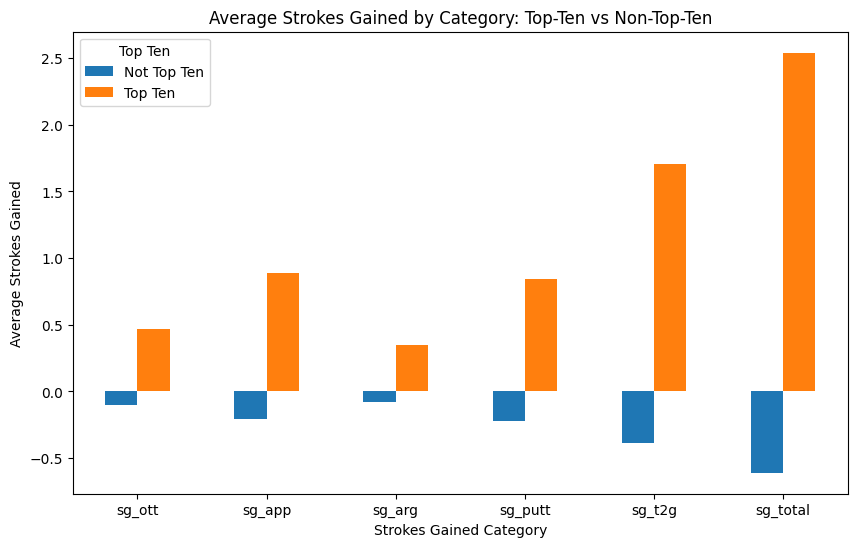

In [16]:
import matplotlib.pyplot as plt

sg_features = ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt', 'sg_t2g', 'sg_total']

avg_sg = df_temp.groupby('top_ten')[sg_features].mean()

avg_sg.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Strokes Gained by Category: Top-Ten vs Non-Top-Ten')
plt.xlabel('Strokes Gained Category')
plt.ylabel('Average Strokes Gained')
plt.xticks(rotation=0)
plt.legend(title='Top Ten', labels=['Not Top Ten', 'Top Ten'])
plt.show()



Next check the differences for each strokes gained stat between a top ten player and a not top ten player.

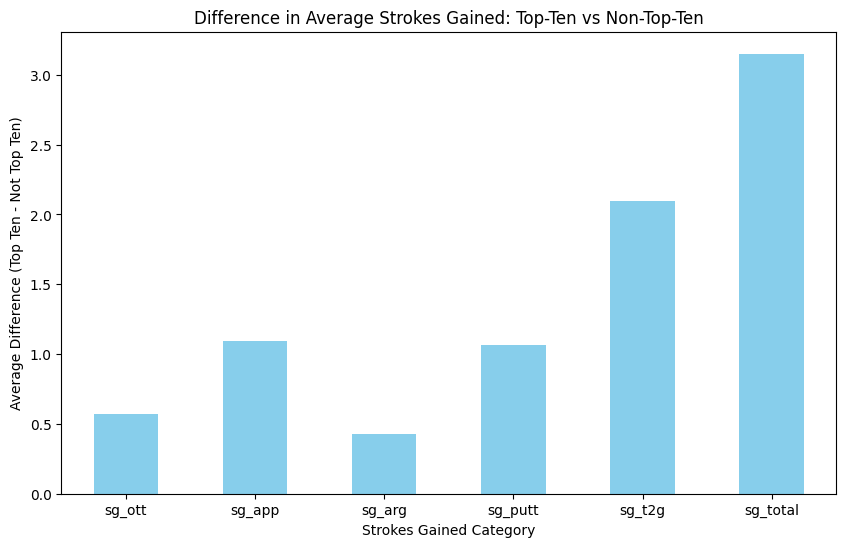

In [17]:
diff_sg = avg_sg.loc[1] - avg_sg.loc[0]

plt.figure(figsize=(10,6))
diff_sg.plot(kind='bar', color='skyblue')
plt.title('Difference in Average Strokes Gained: Top-Ten vs Non-Top-Ten')
plt.xlabel('Strokes Gained Category')
plt.ylabel('Average Difference (Top Ten - Not Top Ten)')
plt.xticks(rotation=0)
plt.show()

It is not a surprise that 'strokes gained total' and 'strokes gained tee to green' dominate in the above plots. They are statistics that combine multiple shot types and will therefore certainly have a bigger impact. Disregarding them, putting and approach play seem to be the biggest indicators of successful golf that is likely to produce a top ten finish.

A pairplot can be used to visualise pairwise relationships between strokes gained features.

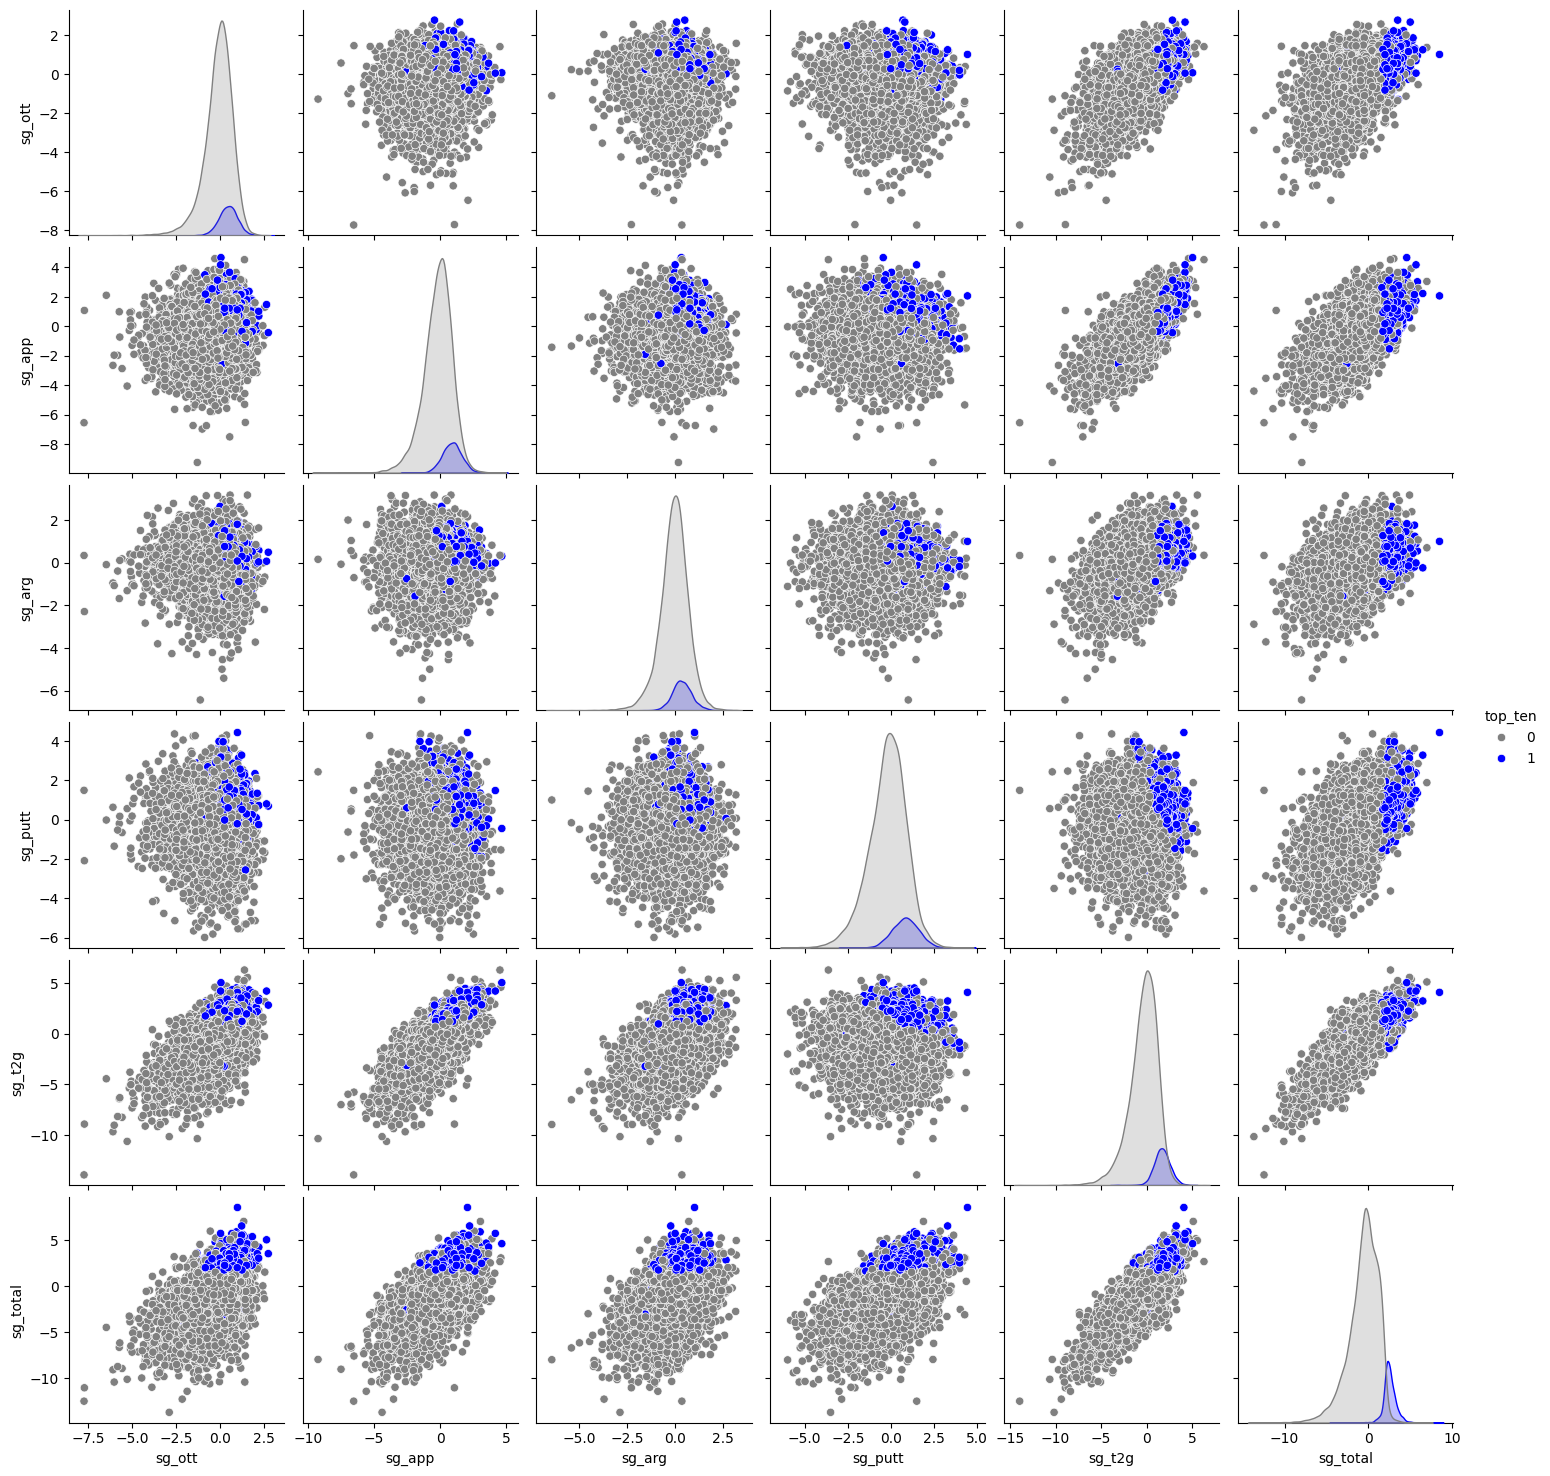

In [18]:
import seaborn as sns

sns.pairplot(df_temp[sg_features + ['top_ten']], hue='top_ten', palette=['grey','blue'])
plt.show()


This indicates that, in general, all strokes gained stastics are important in a high level golf performance. However, there are some examples where a particularly good performance in one area can counteract a slightly negative performance in another, such as the comparison between 'approach' and 'putting'.

## Heatmaps to analyse correlations with different features and a top ten finish.

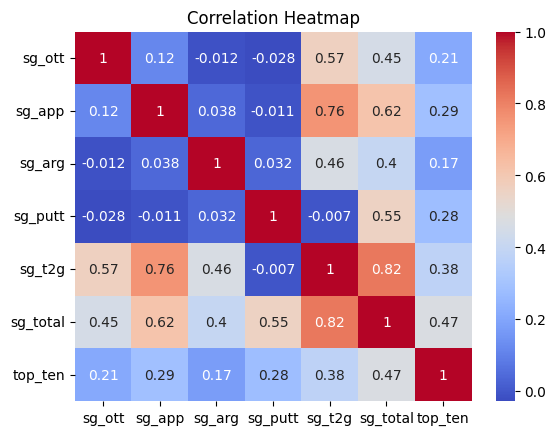

In [19]:
sns.heatmap(df_temp[sg_features + ['top_ten']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Higher correlations between strokes gained stats and top_ten were expected. On reflection, the binary nature of the 'top_ten' data has create issues in that players who finished just outside the top ten would still have very similar strokes gained stats and are skewing the data. Also, a Pearson correlation method was used and strokes gained data is irregular and non-linnear, a Spearman correlation may be a better solution.

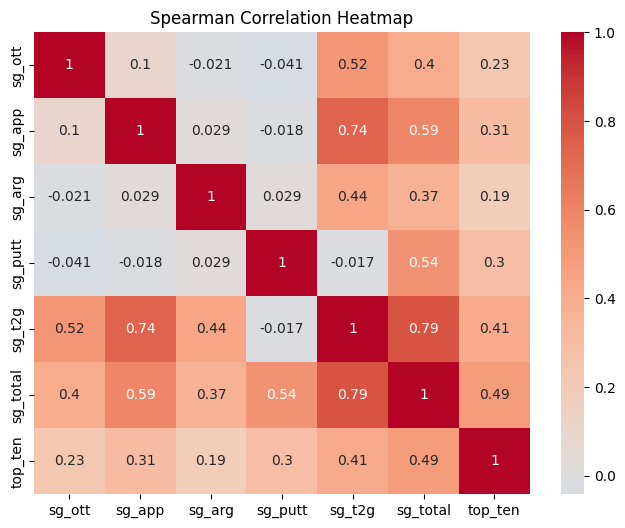

In [28]:
corr_spearman = df_temp[sg_features + ['top_ten']].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()


A Spearman correlation showed slightly stronger relationships between the strokes gained metrics and top-ten finishes; however, the binary nature of the ‘top_ten’ variable still introduces a degree of noise into the analysis. A Spearman correlation heatmap comparing the strokes gained statistics to a true positive indicator (e.g., 'true_pos') may provide a more effective way to visualise and interpret these relationships.

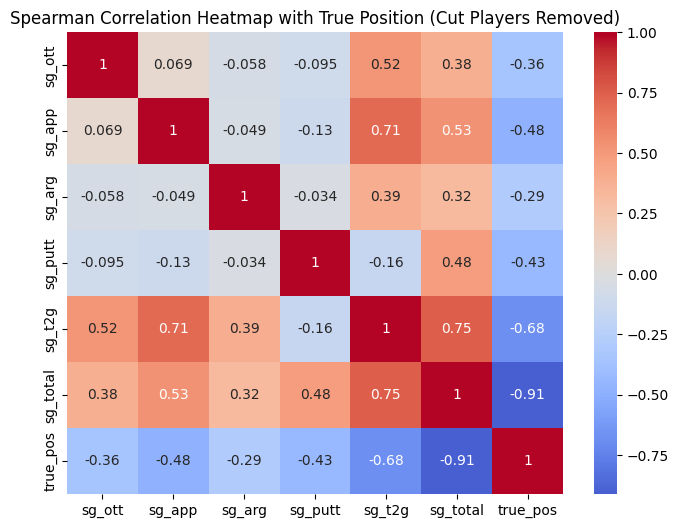

In [26]:
sg_features = ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt', 'sg_t2g', 'sg_total']

df_filtered = df_temp[df_temp['true_pos'] > 0]

corr_spearman = df_filtered[sg_features + ['true_pos']].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap with True Position (Cut Players Removed)')
plt.show()



This now does show a somewhat more significant relationship between strokes gained and finishing position in tournaments. 
Across all these plots, conclusions can be reached that approach play and putting are the biggest factors in determining top ten finishes.
However, overall the correlations between the strokes gained metrics and good tournament finishes remain relatively weak, reflecting the multi-faceted nature of golf performance. Tournament outcomes are influenced by a combination of technical skills, course conditions, mental factors, and variability across rounds, making it difficult for any single metric to show strong predictive power. This must be emphasised to the client.

## Highlighting players who are currently finishing 30-11th and wish to improve to the top 10.

The client specifically requested information on players who are currently finishing between 30th and 11th on a regular basis and wish to improve to reach the top ten and the next plots shall analyse that.
First, to extract groups of 'top ten- elite players, and 'mid-level' players.

In [43]:
top_players = (
    df_temp.groupby('player')
    .agg(
        top_ten_finishes=('top_ten', 'sum'),
        avg_sg_putt=('sg_putt', 'mean'),
        avg_sg_arg=('sg_arg', 'mean'),
        avg_sg_app=('sg_app', 'mean'),
        avg_sg_ott=('sg_ott', 'mean'),
        avg_sg_t2g=('sg_t2g', 'mean'),
        avg_sg_total=('sg_total', 'mean')
    )
    .reset_index()
)

top_15_players = top_players.sort_values(by='top_ten_finishes', ascending=False).head(15)

print(top_15_players)

               player  top_ten_finishes  avg_sg_putt  avg_sg_arg  avg_sg_app  \
144    Dustin Johnson                70     0.163519    0.053056    0.419630   
247     Justin Thomas                68    -0.029225    0.258217    0.646512   
236     Jordan Spieth                62     0.241746    0.296667    0.308571   
376      Rory McIlroy                58    -0.042683    0.195854    0.432073   
230          Jon Rahm                58     0.249022    0.136630    0.370109   
339      Patrick Reed                50     0.376250    0.267647   -0.016029   
454        Tony Finau                50    -0.123557    0.107852    0.290201   
184  Hideki Matsuyama                48    -0.258889    0.194444    0.681270   
73      Brooks Koepka                47     0.138468    0.027928    0.135946   
245       Justin Rose                46     0.119889    0.115333    0.240111   
360     Rickie Fowler                46     0.114380    0.250000    0.097438   
471      Webb Simpson                44 

In [42]:
df_temp['mid_band'] = df_temp['true_pos'].between(11, 30).astype(int)

tournament_counts = df_temp.groupby('player')['true_pos'].count().rename('total_tournaments')

mid_band_counts = df_temp.groupby('player')['mid_band'].sum().rename('mid_band_finishes')

player_stats = pd.concat([tournament_counts, mid_band_counts], axis=1)

player_stats['mid_band_pct'] = player_stats['mid_band_finishes'] / player_stats['total_tournaments']

player_stats = player_stats[player_stats['total_tournaments'] >= 20]

sg_metrics = df_temp.groupby('player').agg(
    avg_sg_putt=('sg_putt', 'mean'),
    avg_sg_arg=('sg_arg', 'mean'),
    avg_sg_app=('sg_app', 'mean'),
    avg_sg_ott=('sg_ott', 'mean'),
    avg_sg_t2g=('sg_t2g', 'mean'),
    avg_sg_total=('sg_total', 'mean')
)

player_stats = player_stats.merge(sg_metrics, on='player')

top_15_mid_pct = player_stats.sort_values(by='mid_band_pct', ascending=False).head(15)

print(top_15_mid_pct)


                         total_tournaments  mid_band_finishes  mid_band_pct  \
player                                                                        
Mito Pereira                            28                 11      0.392857   
Louis Oosthuizen                       122                 47      0.385246   
Hideki Matsuyama                       172                 66      0.383721   
Christiaan Bezuidenhout                 37                 14      0.378378   
Aaron Rai                               28                 10      0.357143   
Patrick Reed                           191                 68      0.356021   
Tommy Fleetwood                         90                 30      0.333333   
Thomas Pieters                          39                 13      0.333333   
Xander Schauffele                      126                 42      0.333333   
Tyrrell Hatton                          88                 29      0.329545   
Patrick Cantlay                         99          

We need to ensure that there is no overlap between elite players and mid-range players for the data to be a success.

In [41]:
player_stats = player_stats.reset_index()
top_15_mid_pct = top_15_mid_pct.reset_index(drop=True)
top_15_players = top_15_players.reset_index(drop=True)
top_ten_players_list = top_15_players['player'].tolist()

filtered_mid_band = top_15_mid_pct[~top_15_mid_pct['player'].isin(top_ten_players_list)]
num_needed = 15 - filtered_mid_band.shape[0]

remaining_players = player_stats[~player_stats['player'].isin(
    top_ten_players_list + filtered_mid_band['player'].tolist()
)].sort_values(by='mid_band_pct', ascending=False)

new_mid_band_list = pd.concat([filtered_mid_band, remaining_players.head(num_needed)], ignore_index=True)

print(new_mid_band_list)




                     player  total_tournaments  mid_band_finishes  \
0              Mito Pereira                 28                 11   
1          Louis Oosthuizen                122                 47   
2   Christiaan Bezuidenhout                 37                 14   
3                 Aaron Rai                 28                 10   
4           Tommy Fleetwood                 90                 30   
5            Thomas Pieters                 39                 13   
6         Xander Schauffele                126                 42   
7            Tyrrell Hatton                 88                 29   
8           Patrick Cantlay                 99                 32   
9            Viktor Hovland                 65                 21   
10            Andy Sullivan                 29                  9   
11        Scottie Scheffler                 73                 22   
12            Daniel Berger                167                 50   
13            Corey Conners       

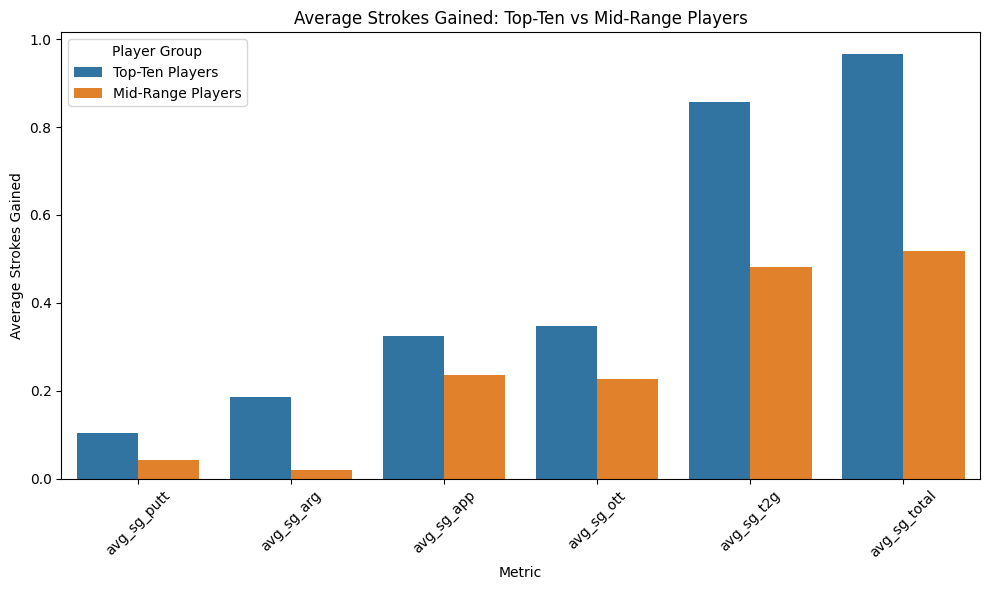

In [40]:
plot_df = pd.DataFrame({
    'Strokes Gained Metric': sg_features,
    'Top-Ten Players': top_15_players[sg_features].mean().values,
    'Mid-Range Players': new_mid_band_list[sg_features].mean().values
})

plot_df_melted = plot_df.melt(id_vars='Strokes Gained Metric', var_name='Player Group', value_name='Average SG')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Strokes Gained Metric', y='Average SG', hue='Player Group', data=plot_df_melted)
plt.title('Average Strokes Gained: Top-Ten vs Mid-Range Players')
plt.ylabel('Average Strokes Gained')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Player Group')
plt.tight_layout()
plt.show()

C:\Users\dmiln\AppData\Local\Temp\ipykernel_5020\794281812.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Strokes Gained Metric', y='Difference (Top-Ten - Mid-Range)', data=diff_df, palette='viridis')


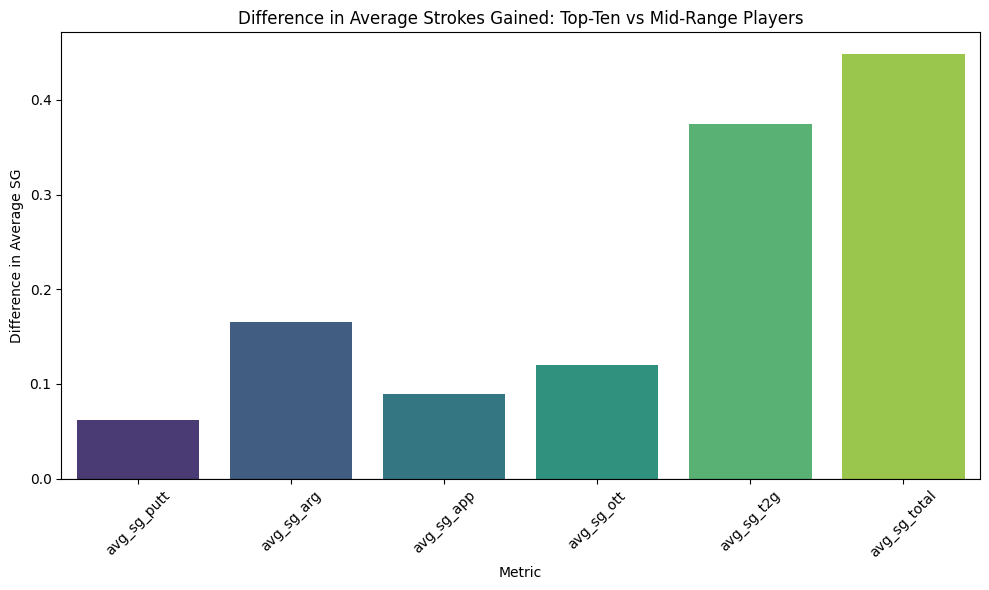

In [ ]:
top_ten_avg = top_15_players[sg_features].mean()
mid_avg = new_mid_band_list[sg_features].mean()

diff = top_ten_avg - mid_avg

diff_df = pd.DataFrame({
    'Strokes Gained Metric': sg_features,
    'Difference (Top-Ten - Mid-Range)': diff.values
})

plt.figure(figsize=(10,6))
sns.barplot(x='Strokes Gained Metric', y='Difference (Top-Ten - Mid-Range)', data=diff_df, palette='viridis')
plt.title('Difference in Average Strokes Gained: Top-Ten vs Mid-Range Players')
plt.ylabel('Difference in Average SG')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # optional: line at 0 for reference
plt.tight_layout()
plt.show()

Interestingly. these results are in stark contrast to the previous set analysing all golfers. For those already at a a level to perform to a standard to regularly finish 11-30th, it would appear the skills of chipping (around the green) and driving (off the tee) are the most in need of development. This suggests that targeted development in these specific skills could help mid-range players bridge the gap to top-ten performance.

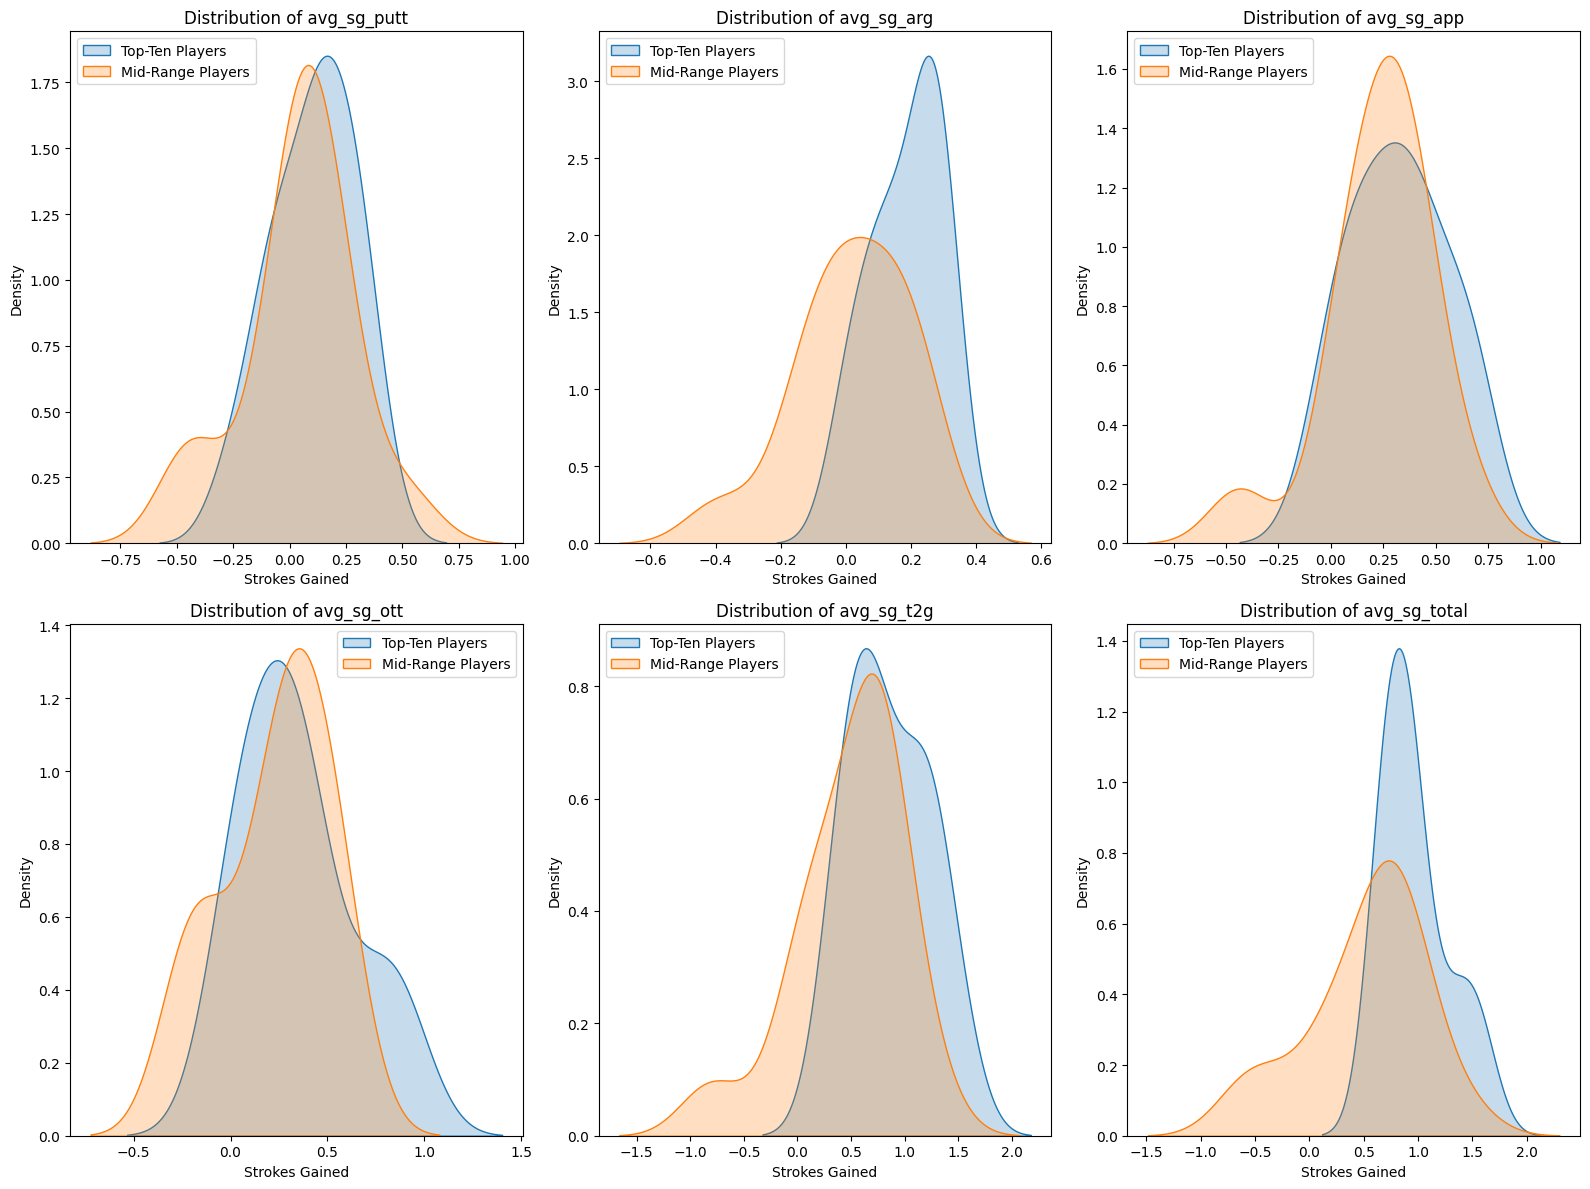

In [39]:
plt.figure(figsize=(16, 12))

for i, metric in enumerate(sg_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(top_15_players[metric], label='Top-Ten Players', fill=True)
    sns.kdeplot(new_mid_band_list[metric], label='Mid-Range Players', fill=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel('Strokes Gained')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



The KDE plot further emphasises the difference in the 'around the green' metric for elite players in comparison to mid-range players. A Number of mid-range players even slip into negative around the green statistics, whereas elite players are all of a very similar standard of performance. 